In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
df=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df['gender'].replace('Female',0,inplace=True) 
df['gender'].replace('Male',1,inplace=True)

In [5]:
import tensorflow as tf
train_df = df.sample(frac=0.70, random_state=4) 
val_df = df.drop(train_df.index)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

In [7]:
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

In [8]:
range = max_val - min_val

In [9]:
train_df = (train_df - min_val)/(range)
val_df = (val_df- min_val)/(range)

In [10]:
x_train = train_df.drop('gender',axis=1)
x_val = val_df.drop('gender',axis=1)
y_train = train_df['gender']
y_val = val_df['gender']

In [11]:
input_shape = [x_train.shape[1]]
input_shape

[7]

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=64, activation='relu',input_shape=input_shape),tf.keras.layers.Dense(units=64, activation='relu'),tf.keras.layers.Dense(units=32, activation='relu'),tf.keras.layers.Dense(units=1)])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                512       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='mae')

In [17]:
losses=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=256,epochs=15,)

Epoch 1/15
14/14 [==============================] - 1s 19ms/step - loss: 0.4166 - val_loss: 0.2676
Epoch 2/15
14/14 [==============================] - 0s 5ms/step - loss: 0.1802 - val_loss: 0.1521
Epoch 3/15
14/14 [==============================] - 0s 5ms/step - loss: 0.1294 - val_loss: 0.1170
Epoch 4/15
14/14 [==============================] - 0s 5ms/step - loss: 0.1031 - val_loss: 0.0983
Epoch 5/15
14/14 [==============================] - 0s 5ms/step - loss: 0.0876 - val_loss: 0.0822
Epoch 6/15
14/14 [==============================] - 0s 6ms/step - loss: 0.0751 - val_loss: 0.0720
Epoch 7/15
14/14 [==============================] - 0s 5ms/step - loss: 0.0677 - val_loss: 0.0665
Epoch 8/15
14/14 [==============================] - 0s 5ms/step - loss: 0.0598 - val_loss: 0.0580
Epoch 9/15
14/14 [==============================] - 0s 5ms/step - loss: 0.0541 - val_loss: 0.0536
Epoch 10/15
14/14 [==============================] - 0s 5ms/step - loss: 0.0508 - val_loss: 0.0514
Epoch 11/15
14/14 

In [18]:
model.predict(x_val.iloc[0:3, :])

1/1 [==============================] - 0s 104ms/step


array([[0.97319984],
       [1.0089397 ],
       [1.0179794 ]], dtype=float32)

In [19]:
y_val.iloc[0:3]

0    1.0
5    1.0
6    1.0
Name: gender, dtype: float64

<AxesSubplot: >

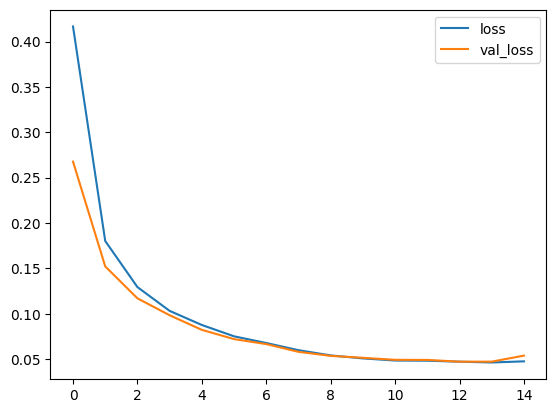

In [20]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()